<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [2]:
import pandas as pd
df = pd.read_csv("carprices.csv")
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

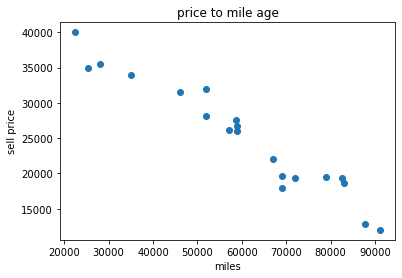

In [4]:
plt.xlabel("miles")
plt.ylabel("sell price")
plt.title("price to mile age")
plt.scatter(df['Mileage'],df['Sell Price($)'])

**Car Age Vs Sell Price ($)**

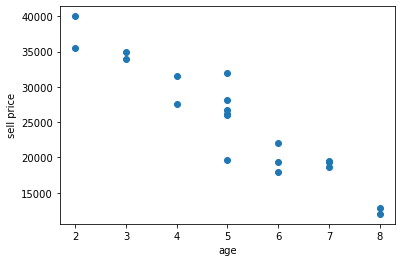

In [5]:
plt.xlabel("age")
plt.ylabel("sell price")
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

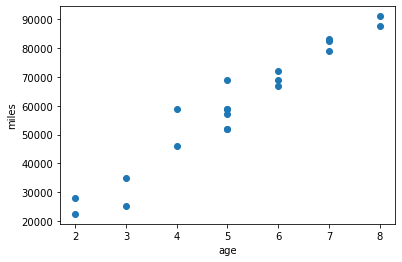

In [6]:
plt.ylabel("miles")
plt.xlabel("age")
plt.scatter(df['Age(yrs)'],df['Mileage'])

In [8]:
df["Sell Price($)"] [df["Mileage"] < 60000].mean()

31140.909090909092

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [7]:
X = df[['Mileage','Age(yrs)']]

In [8]:
y = df['Sell Price($)']

In [22]:
x ==> features ( to be trained )
x train 
x test 
y ==> result ( to be predicted )

y train 
y test 

SyntaxError: invalid syntax (<ipython-input-22-e321105bfe79>, line 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [10]:
X_train

,Mileage,Age(yrs)
18,87600,8
8,91000,8
1,35000,3
6,52000,5
10,83000,7
9,67000,6
11,79000,7
15,25400,3
16,28000,2
4,46000,4


In [11]:
X_test

,Mileage,Age(yrs)
0,69000,6
19,52000,5
7,72000,6
2,57000,5


In [12]:
y_train

18    12800
8     12000
1     34000
6     32000
10    18700
9     22000
11    19500
15    35000
16    35500
4     31500
17    19700
13    27500
5     26750
3     40000
14    19400
12    26000
Name: Sell Price($), dtype: int64

In [12]:
type(y_train)

pandas.core.series.Series

In [13]:
y_test

0     18000
19    28200
7     19300
2     26100
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [14]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train) # actual train ( learn )

LinearRegression()

In [15]:
X_test

,Mileage,Age(yrs)
0,69000,6
19,52000,5
7,72000,6
2,57000,5


In [16]:
clf.predict(X_test)

array([22147.50131129, 28118.16726574, 21158.15595568, 26469.25833973])

In [17]:
y_test

0     18000
19    28200
7     19300
2     26100
Name: Sell Price($), dtype: int64

In [18]:
clf.score(X_train, y_train) # training accuracy

0.946942651850141

In [19]:
clf.score(X_test, y_test) # test accuracy 

0.7238039973358952

**random_state argument**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=11)
X_test

,Mileage,Age(yrs)
3,22500,2
5,59000,5
10,83000,7
6,52000,5
14,82450,7


In [21]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [22]:
clf.score(X_train, y_train)

0.9566522751819245

In [23]:
clf.score(X_test, y_test)

0.8384929507498586

In [46]:
print(df["Mileage"].mean())
df["Mileage"].std()

59736.5


20595.441824524387

In [47]:
print(df["Age(yrs)"].mean())
df["Age(yrs)"].std()

5.15


1.7851728502481652

In [43]:
for i in df.columns[:2]:
    print(i)
    print(df[i].mean())
    print(df[i].std())
    print()

Mileage
59736.5
20595.441824524387

Age(yrs)
5.15
1.7851728502481652



In [35]:
df.describe()

,Mileage,Age(yrs),Sell Price($)
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,25197.500000
std,20595.441825,1.785173,7834.479713
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,26050.000000
75%,73750.000000,6.250000,31625.000000
max,91000.000000,8.000000,40000.000000
